# Week2授業課題　富士下山

授業前課題2では「勾配降下法」に触れました。
勾配降下法は山や谷を下ることに例えられます。
先週は紙を折って超えることを目指した富士山を、今週は頂上付近から下りていくことにしましょう。
以下の図は富士山の断面図です。相模湾から富士山頂上付近を通り南アルプス方面へと切り取りました。
縦軸は標高、横軸は300等分した番号が振られています。

この断面図を見れば低い場所はすぐに分かりますが、あなたは暗闇の中、赤い点の箇所(x=136)にいるという状況を想像します。
足元の傾きしか分からない中で富士山から下りるというプログラムを作っていきましょう。
データをcsvファイルで配布しますので、以下のコードで読み込みます。

左から順番に「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」となっています。
標高と距離の単位はメートルです。

In [1]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session1_mtfuji_data.csv",delimiter=",", skiprows=1)

In [2]:
# 左から順番に「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」となっています。
# 標高と距離の単位はメートルです。
print(fuji[0:10])

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


## 【問題1】断面図の作成

前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。
これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

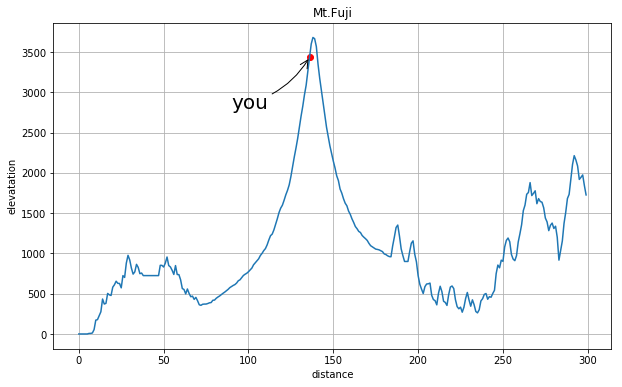

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.annotate('you', xy=(fuji[136][0], fuji[136][3]), xytext=(90, 2800), size=20,
                arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))

plt.title("Mt.Fuji")
plt.xlabel("distance")
plt.ylabel("elevatation")

plt.plot(fuji[:, 0], fuji[:, 3])
plt.scatter(fuji[136,0], fuji[136,3], marker='o', color='red')

plt.grid()
plt.show()

## 【問題2】勾配の計算の関数

授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。

ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。
この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

勾配は授業前課題で行ったように、以下の計算で求まります。

yの変化量
ーーーーー
xの変化量

このデータでは「標高（elevation)」がyに相当します。xはそのまま「その地点の番号(x)」です。

In [4]:
def calculate_grad(x):
    return (fuji[x,3] - fuji[x-1,3]) #xの増加量は１なので省略する 

calculate_grad(x=136)

168.35000000000036

## 【問題3】勾配降下法の関数を作成

授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。

数式で表すと 「移動すべき地点 = 今いる地点 - α ×今いる地点の勾配」 となります。

この関数を使い、あなたが今いるxが136の地点（標高3434.59m）から、山を下っていきましょう。
移動毎の標高はリストに記録し、その過程を可視化してください。
断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。

実装上の注意：
    移動すべき地点は基本的には少数となりますが、勾配の情報は整数値の場所でしか得られません。
    そのため、四捨五入により整数値に変換する必要があります。

可視化のヒント：
    断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。

αの補足：
    αは0より大きい任意の値をとるハイパーパラメータです。
    機械学習の分野では学習率という名前で呼ばれます。
    この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる αの値を見つけましょう。

初期値の補足：
    最初に居たx=136の地点のことを初期値と呼びます。
    この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

In [5]:
def Gradient_descent(x, alpha, iter):
    y_array = []
    for i in range(iter):
        grad = calculate_grad(x)    
        x = int(x - alpha * grad)
        y = fuji[x,3]
        y_array =  np.append(y_array,y)
    return y_array

y_array = Gradient_descent(136, 0.1, 20)
y_array

array([1561.94, 1219.86,  973.32,  817.62,  753.68,  725.72,  660.43,
        602.36,  575.07,  519.54,  488.4 ,  458.66,  420.6 ,  418.41,
        377.62,  371.19,  371.04,  368.91,  362.29,  371.19])

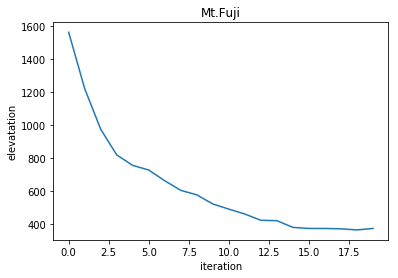

In [6]:
plt.plot(y_array)
plt.title("Mt.Fuji")
plt.xlabel("iteration")
plt.ylabel("elevatation")
plt.show()

## 【問題4】初期値の変更

ここまでの問題では最初のxを136としましたが、xの初期値を変更すると結果が変化します。
特にxを139より大きい値にすると、富士山の反対側の斜面を下りていくことになります。
そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化してください。

In [7]:
y_array = Gradient_descent(140, 0.1, 20)
y_array    

array([2240.98, 1590.97, 1429.03, 1259.24, 1222.48, 1160.85, 1095.73,
       1068.05, 1053.28, 1049.33, 1049.33, 1049.33, 1049.33, 1049.33,
       1049.33, 1049.33, 1049.33, 1049.33, 1049.33, 1049.33])

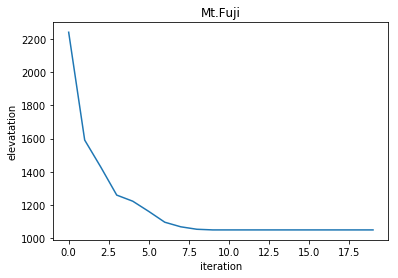

In [8]:
plt.plot(y_array)
plt.title("Mt.Fuji")
plt.xlabel("iteration")
plt.ylabel("elevatation")
plt.show()

## 【問題5】（アドバンス課題）並列計算

初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。

for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。
ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。
この改良は次のハイパーパラメータの検証にも応用することができます。

ヒント：
    NumPyは配列間で四則演算などの操作が可能です。以下のサンプルコードの3行目と4行目の挙動を参考にしてください。
    特に4行目の計算はブロードキャストと呼ばれるNumPy独特の機能であるため、各自でも調査してください。

## 【問題6】（アドバンス課題）ハイパーパラメータの検証

In [9]:
勾配降下法の中で α はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。
これを発展させ、α を一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。
うまい下り方となる α を見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

ヒント：
    検証のための一例として、横軸を α 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法が考えられます。

SyntaxError: invalid syntax (<ipython-input-9-828985260121>, line 1)

## 【問題7】（アドバンス課題）局所最適解

In [ ]:
山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。
局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。
言葉だけではなく、作成した関数も活用できると良いでしょう。